In [ ]:
from PIL import Image
import math
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:
def loadImages(path):   
    image_data = [] 
    lbls  = []
    paths = []
    for filename in os.listdir(path):
        paths.append(filename)
        if filename.startswith("W"):
          lbls.append(0)
        elif filename.startswith("F"):
          lbls.append(1)
        elif filename.startswith("S"):
          lbls.append(2)
      
        img = Image.open(path+'/'+filename)
        newsize = (50, 50)
        img = img.resize(newsize)
        img = np.asarray(img).reshape(-1)
        image_data.append(img)
            
    return np.array(image_data).T,lbls,paths

In [ ]:
def PCA_ImageSpaceVisualization(X):
    meanVec = []

    X_meaned = X- X.mean()
    cov_mat = np.cov(X_meaned.T , rowvar = False)
    eigValues,eigVector = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigValues)[::-1]
    eigen_vector_sorted = eigVector[:, sorted_index]
    eigen_vector_subset = eigen_vector_sorted[:, 0:2]
    print(eigen_vector_subset.shape,cov_mat.shape)
    X_reduced = np.dot(eigen_vector_subset.T, X_meaned)

    return X_reduced,X_meaned

X,lbls,paths = loadImages("/content/images")
X_reduced,X_mean = PCA_ImageSpaceVisualization(X)

In [ ]:
print('Shape after PCA',X_reduced.shape)
y, x = zip(*X_reduced.T)
fig, ax = plt.subplots(figsize= (10,5))

ax.scatter(y,x) 
for x0, y0, image in zip(y, x,X.T):
    ab = AnnotationBbox(OffsetImage(image.reshape(50,50,3)), (x0, y0))
    ax.add_artist(ab)


# ΙΙΙ.

We observe that the images that represent winter are close to each other. Images that make > 90 degree angle are not alike. Οn the other hand, images that make < 90 degree angle are similar. So , whhem two images make an angle less than 90 degree represent the same season.


The goal of the PCA is to reduce the dimensions/components and at the same time to keep as many information as it is possible. So , we have  achieve the goal as we observe from the scatter. 



The angle between two images is formed if we draw two straight lines from  the origin  to the points that represent the images,after PCA transformation.

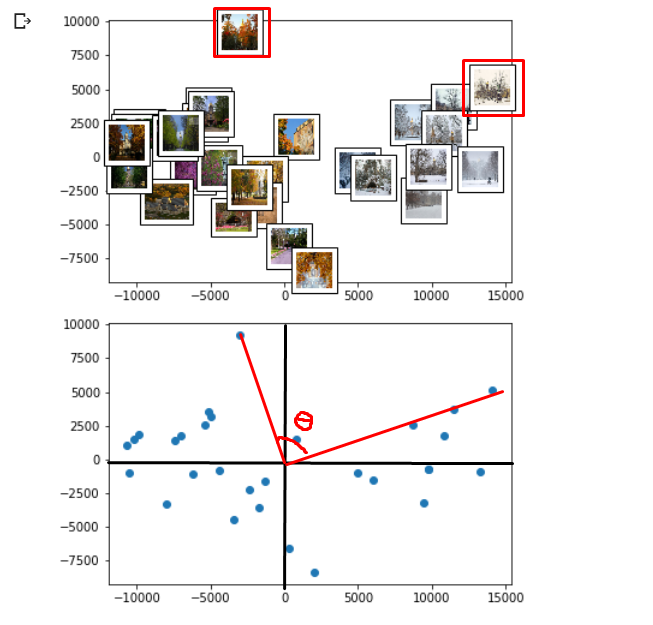

## IV 

As we can see from the above figure images that represent the winter season , are gathered in the upper right part of the plane. Τhis is an outcome of the white colour because white colour is more distinctive.

Spring and Fall image classificaton is a bit less successful , because the colours of spring and fall season are similar.



Source: -> https://www.askpython.com/python/examples/principal-component-analysis

Dimensions got a resize of (50,50) because the RAM was not enough and the program was crushing.

# V.
##  KNN classifier


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


neigh_or = KNeighborsClassifier(n_neighbors=1)
neigh_or.fit(X.T,lbls)
neigh_scores = cross_val_score(neigh_or, X.T, lbls, cv=5,scoring='accuracy')
print("Accuracy of 1-NN with original data: %0.2f " % (neigh_scores.mean()))

neigh3_or = KNeighborsClassifier(n_neighbors=3)
neigh3_or.fit(X.T,lbls)
neigh3_or_scores = cross_val_score(neigh3_or, X.T, lbls, cv=5,scoring='accuracy')
print("Accuracy of 3-NN with original data: %0.2f " % (neigh3_or_scores.mean()))


neigh_red = KNeighborsClassifier(n_neighbors=1)
neigh_red.fit(X.T,lbls)
neigh_scores_red = cross_val_score(neigh_red, X_reduced.T, lbls, cv=5,scoring='accuracy')
print("Accuracy of 1-NN with reduced data: %0.2f " % (neigh_scores_red.mean()))

neigh3_red = KNeighborsClassifier(n_neighbors=3)
neigh3_red.fit(X_reduced.T,lbls)
neigh_scores3=  cross_val_score(neigh3_red, X_reduced.T, lbls, cv=5,scoring='accuracy')
print("Accuracy of 3-NN with reduced data: %0.2f " % (neigh_scores3.mean()))
